In [25]:
def knapsack(weights, values, capacity):
    n = len(values)
    dp = [[0 for _ in range(capacity + 1)] for _ in range(n + 1)]

    # Wypełnianie tablicy DP
    for i in range(1, n + 1):
        for w in range(capacity + 1):
            if weights[i - 1] <= w:
                dp[i][w] = max(dp[i - 1][w], dp[i - 1][w - weights[i - 1]] + values[i - 1])
            else:
                dp[i][w] = dp[i - 1][w]

    # Odtwarzanie wybranych przedmiotów
    w = capacity
    selected_items = []
    for i in range(n, 0, -1):
        if dp[i][w] != dp[i - 1][w]:
            selected_items.append(i - 1)  # dodajemy indeks przedmiotu
            w -= weights[i - 1]

    selected_items.reverse()  # zachowanie oryginalnej kolejności
    return dp[n][capacity], selected_items

In [16]:
import pandas as pd

data = pd.read_csv('knapsack_5_items.csv')

weights = data['Weights'].apply(lambda x: [int(i) for i in x.strip('[]').split()]).tolist()
values = data['Prices'].apply(lambda x: [int(i) for i in x.strip('[]').split()]).tolist()
capacity = data['Capacity'].tolist()


In [24]:
best_values = []
selected_items = []

for c in range(len(capacity)):
    best_values.append(0)
    selected_items.append([])
    best_values[c], selected_items[c] = knapsack(weights[c], values[c], capacity[c])


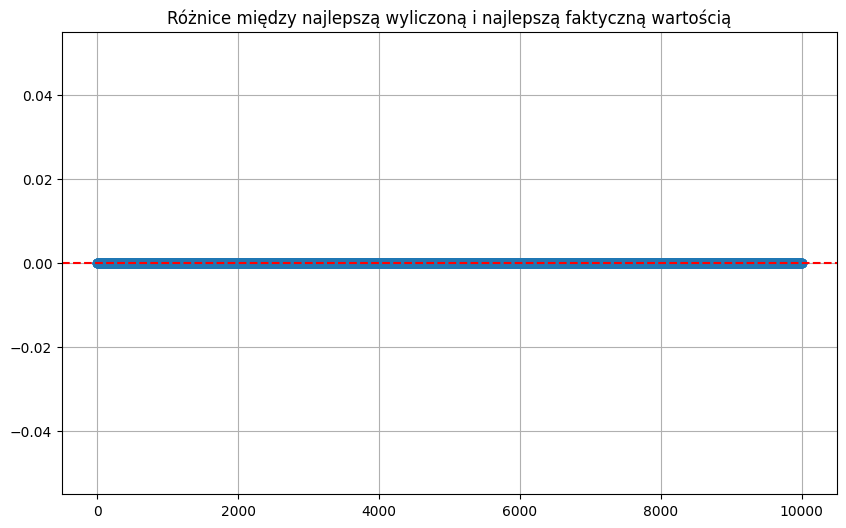

In [21]:
import matplotlib.pyplot as plt

differences = [best_values[i] - data['Best price'][i] for i in range(len(best_values))]

plt.figure(figsize=(10, 6))
plt.plot(range(len(differences)), differences, marker='o', linestyle='-')
plt.axhline(y=0, color='r', linestyle='--')
plt.title('Różnice między najlepszą wyliczoną i najlepszą faktyczną wartością')
plt.grid(True)
plt.show()
